In [8]:
import joblib
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, roc_curve,recall_score,auc, f1_score, classification_report, cohen_kappa_score, confusion_matrix, roc_auc_score


x_test = pd.read_csv('data_split/X_test.csv')
y_test = pd.read_csv('data_split/y_test.csv').iloc[:, 0]

MODEL: DECISION TREE

In [10]:
# Load the saved model and test accuracy on the test set
dt_model = joblib.load('saved_models/decision_tree_model.joblib')
y_test_pred_dt= dt_model.predict(x_test)
test_accuracy_dt = accuracy_score(y_test, y_test_pred_dt)

print(f'Test Accuracy with Loaded Model: {test_accuracy_dt}')

Test Accuracy with Loaded Model: 0.758953722334004


MODEL : XGBoost 

In [11]:
# Load the saved model and test accuracy on the test set
xgb_model = joblib.load('saved_models/xgb_model.joblib')
y_test_pred_xgb= xgb_model.predict(x_test)
test_accuracy_xgb = accuracy_score(y_test, y_test_pred_xgb)

print(f'Test Accuracy with Loaded Model: {test_accuracy_xgb}')

Test Accuracy with Loaded Model: 0.8084507042253521


MODEL : SVM

In [12]:
X_test = pd.read_csv('data_split/X_test.csv')
y_test = pd.read_csv('data_split/y_test.csv').iloc[:, 0]
from joblib import load
from sklearn.metrics import (accuracy_score, balanced_accuracy_score, average_precision_score, f1_score,
                             precision_score, recall_score, cohen_kappa_score, roc_curve, auc, classification_report, confusion_matrix)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the model from file
svm_pipeline = load('saved_models/svm_model_rbf_final.joblib')

# Make predictions on the test set using the loaded model
y_test_pred = svm_pipeline.predict(X_test)
test_accuracy_svm=accuracy_score(y_test, y_test_pred)
# Accuracy and Balanced Accuracy
print(f'Accuracy: {accuracy_score(y_test, y_test_pred)}')
print(f'Balanced Accuracy: {balanced_accuracy_score(y_test, y_test_pred)}')



Accuracy: 0.7340040241448692
Balanced Accuracy: 0.7721207654019429


MODEL COMPARISON

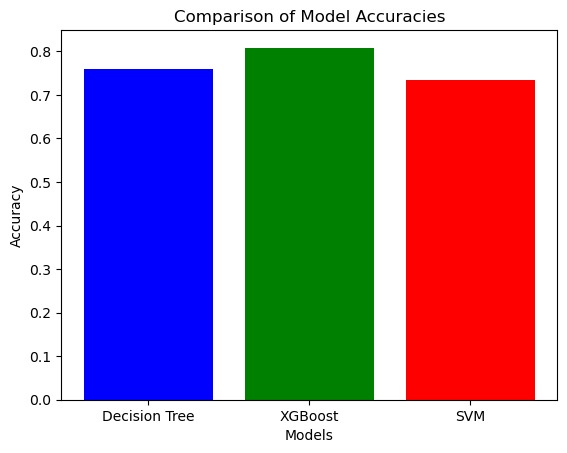

In [17]:
import matplotlib.pyplot as plt



# Storing accuracies and model names
accuracies = [test_accuracy_dt, test_accuracy_xgb, test_accuracy_svm]
model_names = ['Decision Tree', 'XGBoost', 'SVM']

# Creating the bar chart
plt.bar(model_names, accuracies, color=['blue', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies') # Setting the y-axis limit from 0 to 1 (as accuracy ranges from 0 to 1)
plt.show()


In [14]:
# Decision Tree
y_pred_dt = dt_model.predict(x_test)# or 'micro' or 'weighted'
precision_dt = precision_score(y_test, y_pred_dt, average='macro')  

# XGBoost
y_pred_xgb = xgb_model.predict(x_test)
precision_xgb = precision_score(y_test, y_pred_xgb, average='macro')  

# SVM
y_pred_svm = svm_pipeline.predict(X_test)
precision_svm = precision_score(y_test, y_pred_svm, average='macro')  


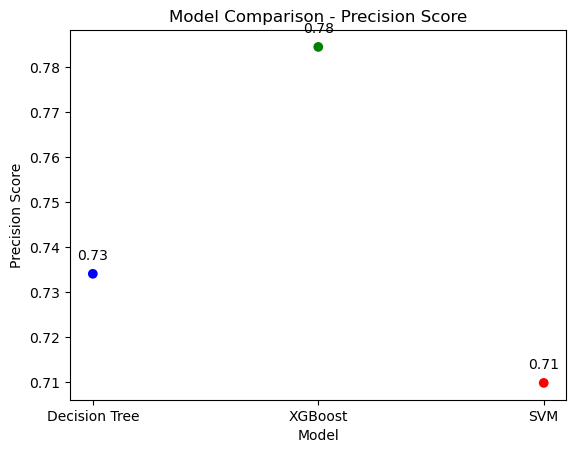

In [15]:
import matplotlib.pyplot as plt

# Assuming you have the precision scores as precision_dt, precision_xgb, and precision_svm
model_names = ['Decision Tree', 'XGBoost', 'SVM']
precisions = [precision_dt, precision_xgb, precision_svm]

# Creating the scatter plot
plt.scatter(model_names, precisions, color=['blue', 'green', 'red'])

# Adding titles and labels
plt.title('Model Comparison - Precision Score')
plt.xlabel('Model')
plt.ylabel('Precision Score')

# Annotating the points with their precision scores
for i, txt in enumerate(precisions):
    plt.annotate(f'{txt:.2f}', (model_names[i], precisions[i]), textcoords="offset points", xytext=(0,10), ha='center')

# Show the plot
plt.show()


This curve shows the trade-off between precision and recall for different threshold values. Precision is the ratio of TP to all positive predictions (TP + FP), and recall is the ratio of TP to all actual positives (TP + FN). This curve is particularly useful when dealing with imbalanced datasets. In such cases, the Precision-Recall curve provides a more informative picture of an algorithm's performance.

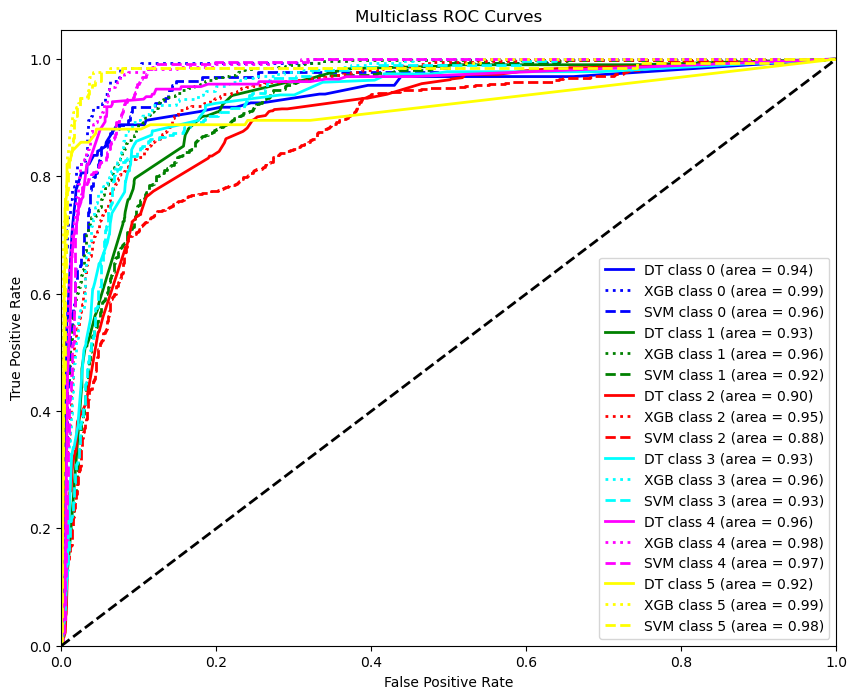

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize


# Binarize the output (convert multiclass labels to a binary format for each class)
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_binarized.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

# Decision Tree model
y_probs_dt = dt_model.predict_proba(x_test)

for i in range(n_classes):
    fpr["dt", i], tpr["dt", i], _ = roc_curve(y_test_binarized[:, i], y_probs_dt[:, i])
    roc_auc["dt", i] = auc(fpr["dt", i], tpr["dt", i])

# XGBoost model
y_probs_xgb = xgb_model.predict_proba(x_test)

for i in range(n_classes):
    fpr["xgb", i], tpr["xgb", i], _ = roc_curve(y_test_binarized[:, i], y_probs_xgb[:, i])
    roc_auc["xgb", i] = auc(fpr["xgb", i], tpr["xgb", i])

# SVM model 
y_scores_svm = svm_pipeline.decision_function(X_test)


for i in range(n_classes):
    fpr["svm", i], tpr["svm", i], _ = roc_curve(y_test_binarized[:, i], y_scores_svm[:, i])
    roc_auc["svm", i] = auc(fpr["svm", i], tpr["svm", i])


# Plot all ROC curves
plt.figure(figsize=(10, 8))

colors = cycle(['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr["dt", i], tpr["dt", i], color=color, lw=2, label=f'DT class {i} (area = {roc_auc["dt", i]:.2f})')
    plt.plot(fpr["xgb", i], tpr["xgb", i], color=color, lw=2, linestyle=':', label=f'XGB class {i} (area = {roc_auc["xgb", i]:.2f})')
    plt.plot(fpr["svm", i], tpr["svm", i], color=color, lw=2, linestyle='--', label=f'SVM class {i} (area = {roc_auc["svm", i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curves')
plt.legend(loc="lower right")
plt.show()


ROC Curve
The Receiver Operating Characteristic (ROC) curve is a graphical plot that illustrates the diagnostic ability of a binary classifier as its discrimination threshold is varied. It's created by plotting the True Positive Rate (TPR, or recall) against the False Positive Rate (FPR):

True Positive Rate (TPR): TPR = TP / (TP + FN).
False Positive Rate (FPR): FPR = FP / (FP + TN).
The Area Under the Curve (AUC) value is a measure of the model's ability to distinguish between the classes. An AUC of 0.5 suggests no discriminative ability (equivalent to random guessing), while an AUC of 1.0 represents perfect discrimination.

